In [1]:
pants = ("Those are awesome!!!")


In [2]:
print(pants)

Those are awesome!!!


In [3]:
!pip install python-dotenv
!pip install yfinance
!pip install tiingo
!pip install numpy
!pip install tensorflow
!pip install hvplot

import os
import requests
import pandas as pd
import json
from dotenv import load_dotenv
import pprint

import time
import datetime
import pandas as pd
import requests
import yfinance as yf
import numpy as np
from sklearn import preprocessing
import requests
import hvplot.pandas

from numpy.random import seed
from tensorflow import random





     |████████████████████████████████| 63 kB 1.3 MB/s 
     |████████████████████████████████| 6.4 MB 29.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
     |████████████████████████████████| 462 kB 5.0 MB/s 
     |████████████████████████████████| 3.1 MB 4.9 MB/s 


In [4]:
# Import the required libraries and dependencies

import os
import requests
import pandas as pd
import json
from dotenv import load_dotenv
import pprint

import time
import datetime
import pandas as pd
import requests
import yfinance as yf
import numpy as np
from sklearn import preprocessing
import requests
import hvplot.pandas

from numpy.random import seed
from tensorflow import random


In [5]:
TIINGO_API_KEY = os.getenv("1b545063658e8ac3669f26afd4f3439ff66adb3f")
load_dotenv()

headers = {
        'Content-Type': 'application/json'
        }
requestResponse = requests.get("https://api.tiingo.com/api/test?token=1b545063658e8ac3669f26afd4f3439ff66adb3f",
                                    headers=headers)
print(requestResponse.json())



{'message': 'You successfully sent a request'}


In [7]:
from tiingo import TiingoClient


config = {
    'api_key': '1b545063658e8ac3669f26afd4f3439ff66adb3f',
    'session': True # Reuse HTTP sessions across API calls for better performance
}

# Throughout the rest of this notebook, you'll use the "client" to interact with the Tiingo backend services.
client = TiingoClient(config)

# You can obtain cryptocurrency metadata using the following method.
# NOTE: Crypto symbol MUST be encapsulated in brackets as a Python list!

meta_data = client.get_crypto_metadata(['BTCUSD'], fmt='json')

#You can obtain top-of-book cryptocurrency quotes from the ``get_crypto_top_of_book()`` method.
# NOTE: Crypto symbol MUST be encapsulated in brackets as a Python list!

book_data = crypto_price = client.get_crypto_top_of_book(['BTCUSD'])

# You can obtain historical Cryptocurrency price quotes from the get_crypto_price_history() method.
# NOTE: Crypto symbol MUST be encapsulated in brackets as a Python list!

history_data_BTC = client.get_crypto_price_history(tickers = ['BTCUSD'], startDate='2020-12-1',
                                endDate='2021-11-30', resampleFreq='1Day')

history_data_BTC

history_data_BTC[0]['priceData']

[{'close': 18793.893916419034,
  'date': '2020-12-01T00:00:00+00:00',
  'high': 19902.917357628077,
  'low': 18062.89812033529,
  'open': 19690.216670754748,
  'tradesDone': 2118819.0,
  'volume': 172122.84580794908,
  'volumeNotional': 3234858504.7067456},
 {'close': 19208.893093693732,
  'date': '2020-12-02T00:00:00+00:00',
  'high': 19339.721844582993,
  'low': 18333.281531012995,
  'open': 18780.031909617115,
  'tradesDone': 1636220.0,
  'volume': 99301.03448131388,
  'volumeNotional': 1907462955.4447534},
 {'close': 19428.2042743612,
  'date': '2020-12-03T00:00:00+00:00',
  'high': 19604.522036807055,
  'low': 18872.26551162489,
  'open': 19208.764210122692,
  'tradesDone': 1297704.0,
  'volume': 87118.9630710539,
  'volumeNotional': 1692565010.714965},
 {'close': 18675.32401978046,
  'date': '2020-12-04T00:00:00+00:00',
  'high': 19532.317111151377,
  'low': 18588.699197046004,
  'open': 19428.600979366107,
  'tradesDone': 1380855.0,
  'volume': 95732.35454455041,
  'volumeNotion

In [8]:
# turn date into index and rename price data for each asset to make easier to concat

Historical_Crypto_BTC=pd.DataFrame(history_data_BTC[0]['priceData'])

btc_historical = Historical_Crypto_BTC.set_index('date')[['close']].rename(columns={'close':'BTC_DAILY_CLOSE'})

btc_historical

BTC_DAILY_CLOSE
date                                      
2020-12-01T00:00:00+00:00     18793.893916
2020-12-02T00:00:00+00:00     19208.893094
2020-12-03T00:00:00+00:00     19428.204274
2020-12-04T00:00:00+00:00     18675.324020
2020-12-05T00:00:00+00:00     19149.959281
...                                    ...
2021-11-26T00:00:00+00:00     53729.054030
2021-11-27T00:00:00+00:00     54735.965606
2021-11-28T00:00:00+00:00     57291.753134
2021-11-29T00:00:00+00:00     57798.563566
2021-11-30T00:00:00+00:00     56960.633578

[365 rows x 1 columns]

In [9]:

!pip install python-dateutil

pd.to_datetime(btc_historical.index).date

btc_historical.index = pd.to_datetime(btc_historical.index).date

btc_historical

BTC_DAILY_CLOSE
2020-12-01     18793.893916
2020-12-02     19208.893094
2020-12-03     19428.204274
2020-12-04     18675.324020
2020-12-05     19149.959281
...                     ...
2021-11-26     53729.054030
2021-11-27     54735.965606
2021-11-28     57291.753134
2021-11-29     57798.563566
2021-11-30     56960.633578

[365 rows x 1 columns]

In [10]:

history_data_ETH = client.get_crypto_price_history(tickers = ['ETHUSD'], startDate='2020-12-1',
                                endDate='2021-11-30', resampleFreq='1Day')

history_data_ETH

history_data_ETH[0]['priceData']

Historical_Crypto_ETH = pd.DataFrame(history_data_ETH[0]['priceData'])

Historical_Crypto_ETH

volume  volumeNotional  ...          low         high
0    2.847758e+06    1.669183e+09  ...   561.015308   635.887756
1    1.319983e+06    7.880272e+08  ...   575.233084   604.898346
2    1.247079e+06    7.680132e+08  ...   585.973283   623.622322
3    1.432417e+06    8.154646e+08  ...   567.467638   620.082554
4    8.573710e+05    5.117492e+08  ...   561.472555   597.251290
..            ...             ...  ...          ...          ...
360  7.950016e+05    3.212031e+09  ...  3917.747777  4552.818755
361  4.058045e+05    1.662321e+09  ...  4028.972843  4184.699619
362  4.841273e+05    2.079910e+09  ...  3969.784111  4300.158932
363  6.317236e+05    2.808926e+09  ...  4279.204821  4461.049022
364  9.376606e+05    4.342884e+09  ...  4348.283508  4752.661325

[365 rows x 8 columns]

In [11]:

eth_historical = Historical_Crypto_ETH.set_index('date')[['close']].rename(columns={'close':'ETH_DAILY_CLOSE'})

eth_historical

pd.to_datetime(eth_historical.index).date

eth_historical.index = pd.to_datetime(eth_historical.index).date

eth_historical

ETH_DAILY_CLOSE
2020-12-01       586.139232
2020-12-02       596.997805
2020-12-03       615.849544
2020-12-04       569.292834
2020-12-05       596.881932
...                     ...
2021-11-26      4040.282001
2021-11-27      4096.358260
2021-11-28      4296.204212
2021-11-29      4446.448197
2021-11-30      4631.615792

[365 rows x 1 columns]

In [12]:

ticker =  ('SPY')
period1 = int(time.mktime(datetime.datetime(2020,12,1,23,59).timetuple()))
period2 = int(time.mktime(datetime.datetime(2021,11,30,23,59).timetuple()))
interval = '1d'

query_string = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'
data_spy = pd.read_csv(query_string)
data_spy.head(10)

spy_daily_close = pd.DataFrame(data_spy)
spy_daily_close

Date        Open        High  ...       Close   Adj Close     Volume
0    2020-12-01  365.570007  367.679993  ...  366.019989  359.671997   74231400
1    2020-12-02  364.820007  366.959991  ...  366.790009  360.428650   45927000
2    2020-12-03  366.679993  368.190002  ...  366.690002  360.330414   62882000
3    2020-12-04  367.320007  369.850006  ...  369.850006  363.435608   50749900
4    2020-12-07  369.019989  369.619995  ...  369.089996  362.688782   48944300
..          ...         ...         ...  ...         ...         ...        ...
247  2021-11-23  467.220001  469.100006  ...  468.190002  466.550903   73206500
248  2021-11-24  466.059998  469.570007  ...  469.440002  467.796509   61858800
249  2021-11-26  462.339996  463.899994  ...  458.970001  457.363190  112669600
250  2021-11-29  464.070007  466.559998  ...  464.600006  462.973480   86268800
251  2021-11-30  462.000000  464.029999  ...  455.559998  453.965118  148559600

[252 rows x 7 columns]

In [13]:

spy_historical = spy_daily_close[['Date', 'Adj Close']].rename(columns={'Adj Close':'SPY_DAILY_CLOSE'})
spy_historical

spy_historical.set_index('Date', inplace=True)

spy_historical.index = pd.to_datetime(spy_historical.index).date

spy_historical

SPY_DAILY_CLOSE
2020-12-01       359.671997
2020-12-02       360.428650
2020-12-03       360.330414
2020-12-04       363.435608
2020-12-07       362.688782
...                     ...
2021-11-23       466.550903
2021-11-24       467.796509
2021-11-26       457.363190
2021-11-29       462.973480
2021-11-30       453.965118

[252 rows x 1 columns]

In [14]:
#Gold from yfinance
ticker =  ('GLD')
period1 = int(time.mktime(datetime.datetime(2020,12,1,23,59).timetuple()))
period2 = int(time.mktime(datetime.datetime(2021,11,30,23,59).timetuple()))
interval = '1d'

query_string = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'

data_gld = pd.read_csv(query_string)
data_gld.head(10)

gld_daily_close = pd.DataFrame(data_gld)
gld_daily_close

gld_historical = gld_daily_close[['Date', 'Adj Close']].rename(columns={'Adj Close':'GLD_DAILY_CLOSE'})
gld_historical

gld_historical.set_index('Date', inplace=True)

gld_historical.index = pd.to_datetime(gld_historical.index).date

gld_historical


GLD_DAILY_CLOSE
2020-12-01       170.179993
2020-12-02       171.460007
2020-12-03       172.809998
2020-12-04       172.320007
2020-12-07       174.889999
...                     ...
2021-11-23       167.279999
2021-11-24       167.119995
2021-11-26       166.850006
2021-11-29       166.619995
2021-11-30       165.500000

[252 rows x 1 columns]

In [15]:
combined_frame = pd.concat([spy_historical, gld_historical, eth_historical, btc_historical], axis=1, join="inner")
combined_frame 

scaler = preprocessing.MinMaxScaler()
names = combined_frame.columns
d = scaler.fit_transform(combined_frame)
scaled_combined_frame = pd.DataFrame(d, columns=names)
scaled_combined_frame.head()


SPY_DAILY_CLOSE  GLD_DAILY_CLOSE  ETH_DAILY_CLOSE  BTC_DAILY_CLOSE
0         0.012176         0.500000         0.009765         0.015229
1         0.019071         0.550434         0.012312         0.023614
2         0.018176         0.603625         0.016732         0.028045
3         0.046469         0.584319         0.005815         0.012833
4         0.039664         0.685579         0.010985         0.022834

In [16]:
#  Create the Features X and Target y Data
def window_data(df, window, feature_col_number, target_col_number):
    """
    This function accepts the column number for the features (X) and the target (y).
    It chunks the data up with a rolling window of Xt - window to predict Xt.
    It returns two numpy arrays of X and y.
    """
    X = []
    y = []
    for i in range(len(df) - window):
        features = df.iloc[i : (i + window), feature_col_number]
        target = df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

spy_historical['Next Day Close'] = spy_historical.SPY_DAILY_CLOSE.shift(-1)
spy_historical = spy_historical.dropna()
spy_historical


SPY_DAILY_CLOSE  Next Day Close
2020-12-01       359.671997      360.428650
2020-12-02       360.428650      360.330414
2020-12-03       360.330414      363.435608
2020-12-04       363.435608      362.688782
2020-12-07       362.688782      363.750061
...                     ...             ...
2021-11-22       465.933075      466.550903
2021-11-23       466.550903      467.796509
2021-11-24       467.796509      457.363190
2021-11-26       457.363190      462.973480
2021-11-29       462.973480      453.965118

[251 rows x 2 columns]

In [17]:
# Define the window size
window_size = 50

# Set the index of the feature and target columns
feature_column = 0
target_column = 1

# Create the features (X) and target (y) data using the window_data() function.
X, y = window_data(spy_historical, window_size, feature_column, target_column)


# Print a few sample values from X and y
print (f"X sample values:\n{X[:3]} \n")
print (f"y sample values:\n{y[:3]}")
window_size

X sample values:
[[359.671997 360.42865  360.330414 363.435608 362.688782 363.750061
  360.487671 360.369751 359.947174 358.335632 363.180115 363.750061
  365.784149 364.323639 363.020966 362.409119 362.734833 364.146027
  367.274292 366.573639 367.096649 368.961792 363.938782 366.445343
  368.636108 374.113129 376.244751 373.708557 373.787476 374.794098
  373.481537 370.757874 373.669067 378.840149 379.185547 377.843414
  379.333588 378.741486 369.484833 372.662506 365.201965 371.280945
  376.530914 376.826965 381.109863 382.609863 385.373047 385.116486
  384.9487   385.570435]
 [360.42865  360.330414 363.435608 362.688782 363.750061 360.487671
  360.369751 359.947174 358.335632 363.180115 363.750061 365.784149
  364.323639 363.020966 362.409119 362.734833 364.146027 367.274292
  366.573639 367.096649 368.961792 363.938782 366.445343 368.636108
  374.113129 376.244751 373.708557 373.787476 374.794098 373.481537
  370.757874 373.669067 378.840149 379.185547 377.843414 379.333588
  378.

50

In [18]:
# Split Data Between Training and Testing Sets
# Manually splitting the data
split = int(0.7 * len(X))

X_train = X[: split]
X_test = X[split:]

y_train = y[: split]
y_test = y[split:]
X

array([[359.671997, 360.42865 , 360.330414, ..., 385.116486, 384.9487  ,
        385.570435],
       [360.42865 , 360.330414, 363.435608, ..., 384.9487  , 385.570435,
        387.475037],
       [360.330414, 363.435608, 362.688782, ..., 385.570435, 387.475037,
        387.139496],
       ...,
       [444.886749, 444.181488, 439.854675, ..., 467.248474, 465.933075,
        466.550903],
       [444.181488, 439.854675, 432.520447, ..., 465.933075, 466.550903,
        467.796509],
       [439.854675, 432.520447, 432.111908, ..., 466.550903, 467.796509,
        457.36319 ]])

In [19]:
# Scale Data with MinMaxScaler
# Importing the MinMaxScaler from sklearn
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the MinMaxScaler object with the features data X
scaler.fit(X_train)

# Scale the features training and testing sets
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Fit the MinMaxScaler object with the target data Y
scaler.fit(y_train)

# Scale the target training and testing sets
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

#  Reshape Features Data for the LSTM Model
# Reshape the features data
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Print some sample data after reshaping the datasets
print (f"X_train sample values:\n{X_train[:3]} \n")
print (f"X_test sample values:\n{X_test[:3]}")

X_train sample values:
[[[0.021312  ]
  [0.03337891]
  [0.03120585]
  [0.07795357]
  [0.06568066]
  [0.08141266]
  [0.03218553]
  [0.02938726]
  [0.02223255]
  [0.        ]
  [0.01115006]
  [0.01939255]
  [0.0480772 ]
  [0.02668329]
  [0.00852751]
  [0.        ]
  [0.        ]
  [0.00295136]
  [0.04750077]
  [0.03752282]
  [0.04497097]
  [0.07153234]
  [0.        ]
  [0.01706282]
  [0.04712659]
  [0.1222875 ]
  [0.15153965]
  [0.11673557]
  [0.11781858]
  [0.13139952]
  [0.11341917]
  [0.07548207]
  [0.11391111]
  [0.18347963]
  [0.18764997]
  [0.16718806]
  [0.18368671]
  [0.17416889]
  [0.05436433]
  [0.09469993]
  [0.        ]
  [0.        ]
  [0.06625581]
  [0.07007465]
  [0.12788428]
  [0.14649934]
  [0.18375653]
  [0.17711843]
  [0.17045542]
  [0.17848164]]

 [[0.03337891]
  [0.03181227]
  [0.07978269]
  [0.06653827]
  [0.08169332]
  [0.03235858]
  [0.03042194]
  [0.02328222]
  [0.        ]
  [0.06683362]
  [0.01939255]
  [0.0488093 ]
  [0.02727228]
  [0.00852751]
  [0.        ]


In [20]:
# Build and Train the LSTM RNN
# Importing required Keras modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
# Create the LSTM RNN Model Structure
# Define the LSTM RNN model.
model = Sequential()

# Initial model setup
number_units = 30
dropout_fraction = 0.2

# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))

# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))

# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))

# Output layer
model.add(Dense(1))
#  Compile the LSTM RNN Model
# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

# Show the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 30)            3840      
                                                                 
 dropout (Dropout)           (None, 50, 30)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50, 30)            7320      
                                                                 
 dropout_1 (Dropout)         (None, 50, 30)            0         
                                                                 
 lstm_2 (LSTM)               (None, 30)                7320      
                                                                 
 dropout_2 (Dropout)         (None, 30)                0         
                                                                 
 dense (Dense)               (None, 1)                 3

In [21]:
# Train the model
model.fit(X_train, y_train, epochs=100, shuffle=False, batch_size=90, verbose=1)

Epoch 1/100
2/2 [==============================] - 13s 217ms/step - loss: 0.3201
Epoch 2/100
2/2 [==============================] - 0s 153ms/step - loss: 0.2331
Epoch 3/100
2/2 [==============================] - 0s 119ms/step - loss: 0.1535
Epoch 4/100
2/2 [==============================] - 0s 116ms/step - loss: 0.0728
Epoch 5/100
2/2 [==============================] - 0s 137ms/step - loss: 0.0209
Epoch 6/100
2/2 [==============================] - 0s 158ms/step - loss: 0.0199
Epoch 7/100
2/2 [==============================] - 0s 176ms/step - loss: 0.0539
Epoch 8/100
2/2 [==============================] - 0s 120ms/step - loss: 0.0579
Epoch 9/100
2/2 [==============================] - 0s 117ms/step - loss: 0.0319
Epoch 10/100
2/2 [==============================] - 0s 115ms/step - loss: 0.0210
Epoch 11/100
2/2 [==============================] - 0s 116ms/step - loss: 0.0190
Epoch 12/100
2/2 [==============================] - 0s 127ms/step - loss: 0.0253
Epoch 13/100
2/2 [==================

In [22]:
# Model Performance
# Evaluate the model

model.evaluate(X_test, y_test, verbose=0)

0.01732988841831684

In [23]:
# Make Predictions
# Make predictions using the testing data X_test
predicted = model.predict(X_test)

# Recover the original prices instead of the scaled version
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# Recover the original prices instead of the scaled version
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

#  Plotting Predicted Vs. Real Prices
 # Create a DataFrame of Real and Predicted values
stocks = pd.DataFrame({
    "SPY Actual": real_prices.ravel(),
    "SPY Predicted": predicted_prices.ravel()
}, index = spy_historical.index[-len(real_prices): ]) 

# Show the DataFrame's head
stocks.head()




SPY Actual  SPY Predicted
2021-09-02  450.051971     445.490753
2021-09-03  448.442780     446.044037
2021-09-07  447.896484     446.597473
2021-09-08  445.979401     447.144104
2021-09-09  442.463043     447.664124

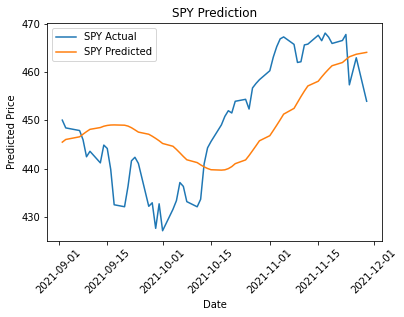

In [24]:
 # Plot the real vs predicted prices as a line chart
stocks.plot(title="SPY Prediction", xlabel="Date", ylabel="Predicted Price",rot=45);

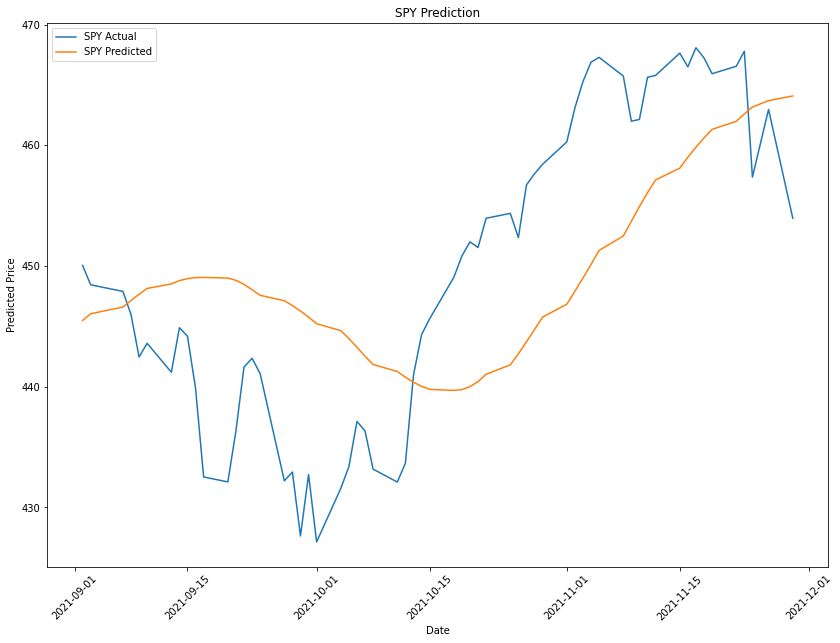

In [25]:
stocks.plot(figsize=(14, 10), title="SPY Prediction", xlabel="Date", ylabel="Predicted Price", rot=45);

In [26]:
combined_frame 

SPY_DAILY_CLOSE  GLD_DAILY_CLOSE  ETH_DAILY_CLOSE  BTC_DAILY_CLOSE
2020-12-01       359.671997       170.179993       586.139232     18793.893916
2020-12-02       360.428650       171.460007       596.997805     19208.893094
2020-12-03       360.330414       172.809998       615.849544     19428.204274
2020-12-04       363.435608       172.320007       569.292834     18675.324020
2020-12-07       362.688782       174.889999       591.341304     19170.308499
...                     ...              ...              ...              ...
2021-11-23       466.550903       167.279999      4341.695776     57576.098440
2021-11-24       467.796509       167.119995      4272.610133     57173.264165
2021-11-26       457.363190       166.850006      4040.282001     53729.054030
2021-11-29       462.973480       166.619995      4446.448197     57798.563566
2021-11-30       453.965118       165.500000      4631.615792     56960.633578

[252 rows x 4 columns]

In [27]:
 # load dataset
dataset = combined_frame 
values = dataset.values
dataset


SPY_DAILY_CLOSE  GLD_DAILY_CLOSE  ETH_DAILY_CLOSE  BTC_DAILY_CLOSE
2020-12-01       359.671997       170.179993       586.139232     18793.893916
2020-12-02       360.428650       171.460007       596.997805     19208.893094
2020-12-03       360.330414       172.809998       615.849544     19428.204274
2020-12-04       363.435608       172.320007       569.292834     18675.324020
2020-12-07       362.688782       174.889999       591.341304     19170.308499
...                     ...              ...              ...              ...
2021-11-23       466.550903       167.279999      4341.695776     57576.098440
2021-11-24       467.796509       167.119995      4272.610133     57173.264165
2021-11-26       457.363190       166.850006      4040.282001     53729.054030
2021-11-29       462.973480       166.619995      4446.448197     57798.563566
2021-11-30       453.965118       165.500000      4631.615792     56960.633578

[252 rows x 4 columns]

In [28]:
# Starting Model for gld_historical 
gld_historical['Next Day Close'] = gld_historical.GLD_DAILY_CLOSE.shift(-1)
gld_historical = gld_historical.dropna()
gld_historical

GLD_DAILY_CLOSE  Next Day Close
2020-12-01       170.179993      171.460007
2020-12-02       171.460007      172.809998
2020-12-03       172.809998      172.320007
2020-12-04       172.320007      174.889999
2020-12-07       174.889999      175.500000
...                     ...             ...
2021-11-22       168.740005      167.279999
2021-11-23       167.279999      167.119995
2021-11-24       167.119995      166.850006
2021-11-26       166.850006      166.619995
2021-11-29       166.619995      165.500000

[251 rows x 2 columns]

In [29]:
# Define the window size
window_size = 50

# Set the index of the feature and target columns
feature_column = 0
target_column = 1

# Create the features (X) and target (y) data using the window_data() function.
X, y = window_data(gld_historical, window_size, feature_column, target_column)


# Print a few sample values from X and y
print (f"X sample values:\n{X[:3]} \n")
print (f"y sample values:\n{y[:3]}")

X sample values:
[[170.179993 171.460007 172.809998 172.320007 174.889999 175.5
  172.5      172.169998 172.490005 171.539993 173.940002 174.899994
  176.740005 176.440002 175.880005 174.490005 175.649994 176.350006
  175.710007 176.350006 177.699997 178.360001 182.330002 182.869995
  179.899994 179.479996 173.339996 173.       174.119995 173.369995
  173.279999 171.130005 172.580002 175.389999 175.279999 173.899994
  174.050003 173.619995 172.520004 172.679993 172.610001 174.229996
  172.110001 171.850006 168.149994 169.809998 171.520004 172.080002
  172.710007 171.210007]
 [171.460007 172.809998 172.320007 174.889999 175.5      172.5
  172.169998 172.490005 171.539993 173.940002 174.899994 176.740005
  176.440002 175.880005 174.490005 175.649994 176.350006 175.710007
  176.350006 177.699997 178.360001 182.330002 182.869995 179.899994
  179.479996 173.339996 173.       174.119995 173.369995 173.279999
  171.130005 172.580002 175.389999 175.279999 173.899994 174.050003
  173.619995 172

In [30]:
# Split Data Between Training and Testing Sets
# Manually splitting the data
split = int(0.7 * len(X))

X_train = X[: split]
X_test = X[split:]

y_train = y[: split]
y_test = y[split:]

In [31]:
# Scale Data with MinMaxScaler
# Importing the MinMaxScaler from sklearn
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the MinMaxScaler object with the features data X
scaler.fit(X_train)

# Scale the features training and testing sets
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Fit the MinMaxScaler object with the target data Y
scaler.fit(y_train)

# Scale the target training and testing sets
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

#  Reshape Features Data for the LSTM Model
# Reshape the features data
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Print some sample data after reshaping the datasets
print (f"X_train sample values:\n{X_train[:3]} \n")
print (f"X_test sample values:\n{X_test[:3]}")

X_train sample values:
[[[0.49999972]
  [0.55043371]
  [0.60362486]
  [0.58431867]
  [0.68557923]
  [0.70961395]
  [0.5914106 ]
  [0.57840815]
  [0.59101678]
  [0.55358525]
  [0.64814829]
  [0.68597304]
  [0.75847154]
  [0.74665108]
  [0.72458657]
  [0.66981902]
  [0.71552388]
  [0.74310514]
  [0.71788846]
  [0.74310514]
  [0.79629629]
  [0.82230119]
  [0.97872367]
  [1.        ]
  [1.        ]
  [1.        ]
  [0.74483044]
  [0.72885318]
  [0.78148453]
  [0.74624017]
  [0.74201103]
  [0.64097747]
  [0.70911643]
  [0.84116517]
  [0.835996  ]
  [0.77114614]
  [0.77819543]
  [0.75798829]
  [0.70629698]
  [0.71381526]
  [0.71052616]
  [0.78665375]
  [0.68702992]
  [0.67481211]
  [0.50093936]
  [0.57894707]
  [0.6593045 ]
  [0.68562019]
  [0.71522569]
  [0.64473697]]

 [[0.55043371]
  [0.60362486]
  [0.58431867]
  [0.68557923]
  [0.70961395]
  [0.5914106 ]
  [0.57840815]
  [0.59101678]
  [0.55358525]
  [0.64814829]
  [0.68597304]
  [0.75847154]
  [0.74665108]
  [0.72458657]
  [0.66981902]


In [32]:
# Create the LSTM RNN Model Structure
# Define the LSTM RNN model.
model = Sequential()

# Initial model setup
number_units = 30
dropout_fraction = 0.2

# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))

# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))

# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))

# Output layer
model.add(Dense(1))

#  Compile the LSTM RNN Model
# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")
# Show the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 50, 30)            3840      
                                                                 
 dropout_3 (Dropout)         (None, 50, 30)            0         
                                                                 
 lstm_4 (LSTM)               (None, 50, 30)            7320      
                                                                 
 dropout_4 (Dropout)         (None, 50, 30)            0         
                                                                 
 lstm_5 (LSTM)               (None, 30)                7320      
                                                                 
 dropout_5 (Dropout)         (None, 30)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                

In [33]:
#  Train the Model
# Train the model
model.fit(X_train, y_train, epochs=100, shuffle=False, batch_size=90, verbose=1)

Epoch 1/100
2/2 [==============================] - 6s 82ms/step - loss: 0.3285
Epoch 2/100
2/2 [==============================] - 0s 72ms/step - loss: 0.2399
Epoch 3/100
2/2 [==============================] - 0s 75ms/step - loss: 0.1642
Epoch 4/100
2/2 [==============================] - 0s 73ms/step - loss: 0.1137
Epoch 5/100
2/2 [==============================] - 0s 78ms/step - loss: 0.0681
Epoch 6/100
2/2 [==============================] - 0s 74ms/step - loss: 0.0490
Epoch 7/100
2/2 [==============================] - 0s 72ms/step - loss: 0.0645
Epoch 8/100
2/2 [==============================] - 0s 77ms/step - loss: 0.0748
Epoch 9/100
2/2 [==============================] - 0s 82ms/step - loss: 0.0527
Epoch 10/100
2/2 [==============================] - 0s 75ms/step - loss: 0.0528
Epoch 11/100
2/2 [==============================] - 0s 69ms/step - loss: 0.0487
Epoch 12/100
2/2 [==============================] - 0s 76ms/step - loss: 0.0541
Epoch 13/100
2/2 [==============================]

In [34]:
# Model Performance
# Evaluate the model
model.evaluate(X_test, y_test, verbose=0)


0.024078048765659332

In [35]:
# Make Predictions
# Make predictions using the testing data X_test
predicted = model.predict(X_test)

# Recover the original prices instead of the scaled version
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

#  Plotting Predicted Vs. Real Prices
 # Create a DataFrame of Real and Predicted values
gold = pd.DataFrame({
    "Gold Actual": real_prices.ravel(),
    "Gold Predicted": predicted_prices.ravel()
}, index = gld_historical.index[-len(real_prices): ]) 

# Show the DataFrame's head
gold.head()

Gold Actual  Gold Predicted
2021-09-02   171.059998      169.467789
2021-09-03   167.710007      169.749466
2021-09-07   167.289993      170.034607
2021-09-08   168.029999      170.219498
2021-09-09   167.179993      170.277924

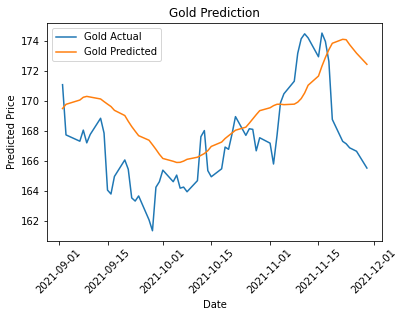

In [36]:
# Plot the real vs predicted prices as a line chart
gold.plot(title="Gold Prediction",xlabel="Date",ylabel="Predicted Price", rot=45);

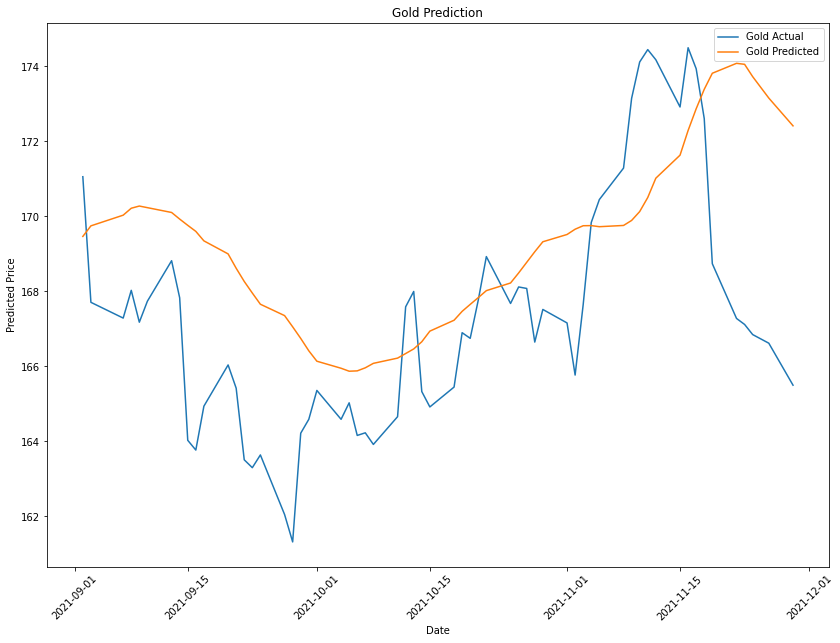

In [37]:
gold.plot(figsize=(14, 10), title="Gold Prediction", xlabel="Date", ylabel="Predicted Price", rot=45);

In [38]:
#Starting Model for ETH_DAILY_CLOSE 
eth_historical['Next Day Close'] = eth_historical.ETH_DAILY_CLOSE.shift(-1)
eth_historical = eth_historical.dropna()
eth_historical

ETH_DAILY_CLOSE  Next Day Close
2020-12-01       586.139232      596.997805
2020-12-02       596.997805      615.849544
2020-12-03       615.849544      569.292834
2020-12-04       569.292834      596.881932
2020-12-05       596.881932      601.614948
...                     ...             ...
2021-11-25      4525.216946     4040.282001
2021-11-26      4040.282001     4096.358260
2021-11-27      4096.358260     4296.204212
2021-11-28      4296.204212     4446.448197
2021-11-29      4446.448197     4631.615792

[364 rows x 2 columns]

In [39]:
# Define the window size
window_size = 50

# Set the index of the feature and target columns
feature_column = 0
target_column = 1

# Create the features (X) and target (y) data using the window_data() function.
X, y = window_data(eth_historical, window_size, feature_column, target_column)


# Print a few sample values from X and y
print (f"X sample values:\n{X[:3]} \n")
print (f"y sample values:\n{y[:3]}")

X sample values:
[[ 586.13923182  596.99780526  615.84954398  569.29283422  596.88193241
   601.61494829  591.34130442  554.92608801  573.28664078  559.03563603
   544.49162835  568.1161738   590.82117677  586.25810098  588.70230386
   635.65483077  642.59212743  653.28141547  658.69040878  638.20361908
   607.68765253  636.48172772  584.31466383  611.75272333  626.91113169
   636.99736896  685.13707514  730.22957508  731.83643097  752.26038268
   737.1376826   729.26273095  774.68042215  978.6411702  1041.83323904
  1100.7056441  1209.38152383 1224.56977577 1216.75157109 1277.45630913
  1254.72073318 1087.46998551 1050.26040928 1129.91351209 1197.88625425
  1168.04235424 1227.74451483 1232.79063125 1258.6624943  1366.67051007]
 [ 596.99780526  615.84954398  569.29283422  596.88193241  601.61494829
   591.34130442  554.92608801  573.28664078  559.03563603  544.49162835
   568.1161738   590.82117677  586.25810098  588.70230386  635.65483077
   642.59212743  653.28141547  658.69040878  6

In [40]:
# Split Data Between Training and Testing Sets
# Manually splitting the data
split = int(0.7 * len(X))

X_train = X[: split]
X_test = X[split:]

y_train = y[: split]
y_test = y[split:]

# Scale Data with MinMaxScaler
# Importing the MinMaxScaler from sklearn
# from sklearn.preprocessing import MinMaxScaler  ------hashed out because it's already done above

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the MinMaxScaler object with the features data X
scaler.fit(X_train)

# Scale the features training and testing sets
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Fit the MinMaxScaler object with the target data Y
scaler.fit(y_train)

# Scale the target training and testing sets
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

#  Reshape Features Data for the LSTM Model
# Reshape the features data
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Print some sample data after reshaping the datasets
print (f"X_train sample values:\n{X_train[:3]} \n")
print (f"X_test sample values:\n{X_test[:3]}")

X_train sample values:
[[[0.01148152]
  [0.01447505]
  [0.01967214]
  [0.00683726]
  [0.0144431 ]
  [0.01574791]
  [0.01291565]
  [0.0028766 ]
  [0.00793829]
  [0.00400953]
  [0.        ]
  [0.        ]
  [0.00181364]
  [0.00054172]
  [0.00122302]
  [0.01431071]
  [0.01624443]
  [0.01922399]
  [0.02073171]
  [0.01502116]
  [0.00651505]
  [0.0145412 ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.00028085]
  [0.00074761]
  [0.00668034]
  [0.00228751]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.01616011]
  [0.05097439]
  [0.05583994]
  [0.05333538]
  [0.07278212]
  [0.06549878]
  [0.01192007]
  [0.        ]
  [0.00618296]
  [0.02839002]
  [0.01863985]
  [0.03814487]
  [0.03979346]
  [0.04824594]
  [0.08353274]]

 [[0.01447505]
  [0.01967214]
  [0.00683726]
  [0.0144431 ]
  [0.01574791]
  [0.01291565]
  [0.0028766 ]
  [0.00793829]
  [0.00400953]
  [0.        ]
  [0.00651288]
  [0.00630041]
  [0.00054172]
  [0.00122302]
  [0.01431071]


In [41]:
# Create the LSTM RNN Model Structure
# Define the LSTM RNN model.
model = Sequential()

# Initial model setup
number_units = 30
dropout_fraction = 0.2

# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))

# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))

# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))

# Output layer
model.add(Dense(1))

#  Compile the LSTM RNN Model
# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

# Show the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 50, 30)            3840      
                                                                 
 dropout_6 (Dropout)         (None, 50, 30)            0         
                                                                 
 lstm_7 (LSTM)               (None, 50, 30)            7320      
                                                                 
 dropout_7 (Dropout)         (None, 50, 30)            0         
                                                                 
 lstm_8 (LSTM)               (None, 30)                7320      
                                                                 
 dropout_8 (Dropout)         (None, 30)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                

In [42]:
# Train the model
model.fit(X_train, y_train, epochs=100, shuffle=False, batch_size=90, verbose=1)

Epoch 1/100
3/3 [==============================] - 6s 78ms/step - loss: 0.1376
Epoch 2/100
3/3 [==============================] - 0s 80ms/step - loss: 0.0788
Epoch 3/100
3/3 [==============================] - 0s 80ms/step - loss: 0.0324
Epoch 4/100
3/3 [==============================] - 0s 82ms/step - loss: 0.0361
Epoch 5/100
3/3 [==============================] - 0s 81ms/step - loss: 0.0465
Epoch 6/100
3/3 [==============================] - 0s 75ms/step - loss: 0.0294
Epoch 7/100
3/3 [==============================] - 0s 75ms/step - loss: 0.0254
Epoch 8/100
3/3 [==============================] - 0s 73ms/step - loss: 0.0263
Epoch 9/100
3/3 [==============================] - 0s 77ms/step - loss: 0.0260
Epoch 10/100
3/3 [==============================] - 0s 75ms/step - loss: 0.0231
Epoch 11/100
3/3 [==============================] - 0s 76ms/step - loss: 0.0275
Epoch 12/100
3/3 [==============================] - 0s 75ms/step - loss: 0.0279
Epoch 13/100
3/3 [==============================]

In [43]:
# Model Performance
# Evaluate the model
model.evaluate(X_test, y_test, verbose=0)

0.10415638238191605

In [44]:
# Make Predictions
# Make predictions using the testing data X_test
predicted = model.predict(X_test)

# Recover the original prices instead of the scaled version
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))
#  Plotting Predicted Vs. Real Prices
 # Create a DataFrame of Real and Predicted values
ethereum = pd.DataFrame({
    "ETH Actual": real_prices.ravel(),
    "ETH Predicted": predicted_prices.ravel()
}, index = eth_historical.index[-len(real_prices): ]) 

# Show the DataFrame's head
ethereum.head()

ETH Actual  ETH Predicted
2021-08-27  3245.284498    3126.278320
2021-08-28  3224.120200    3114.235352
2021-08-29  3228.666653    3103.888672
2021-08-30  3429.661527    3094.033691
2021-08-31  3827.574340    3084.954590

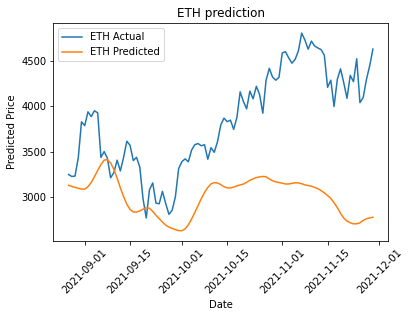

In [45]:
# Plot the real vs predicted prices as a line chart

ethereum.plot(title="ETH prediction",xlabel="Date",ylabel="Predicted Price", rot=45);

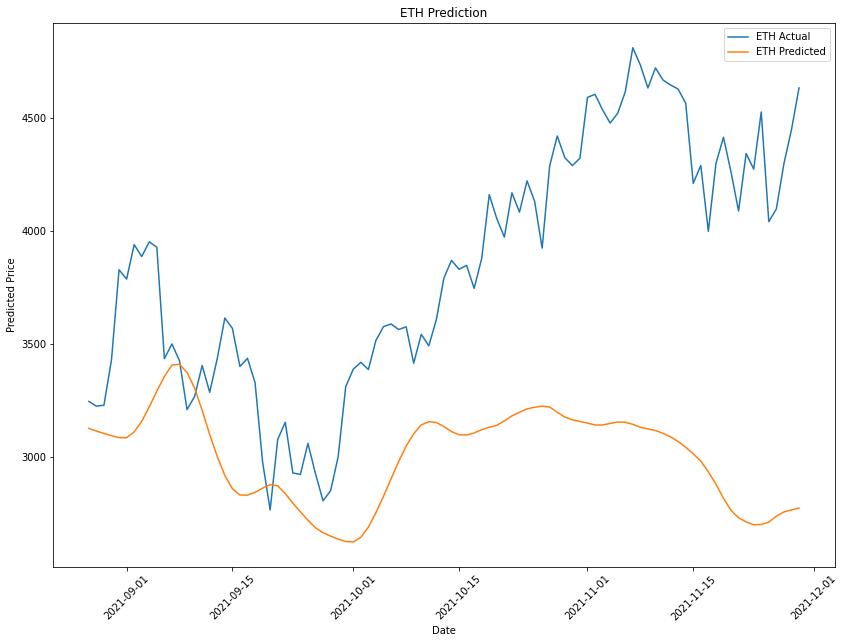

In [46]:
ethereum.plot(figsize=(14, 10), title="ETH Prediction", xlabel="Date", ylabel="Predicted Price", rot=45);

In [47]:
#Starting Model for btc_historical time
btc_historical['Next Day Close'] = btc_historical.BTC_DAILY_CLOSE.shift(-1)
btc_historical = btc_historical.dropna()
btc_historical

BTC_DAILY_CLOSE  Next Day Close
2020-12-01     18793.893916    19208.893094
2020-12-02     19208.893094    19428.204274
2020-12-03     19428.204274    18675.324020
2020-12-04     18675.324020    19149.959281
2020-12-05     19149.959281    19365.245244
...                     ...             ...
2021-11-25     58968.985403    53729.054030
2021-11-26     53729.054030    54735.965606
2021-11-27     54735.965606    57291.753134
2021-11-28     57291.753134    57798.563566
2021-11-29     57798.563566    56960.633578

[364 rows x 2 columns]

In [48]:
# Define the window size
window_size = 50

# Set the index of the feature and target columns
feature_column = 0
target_column = 1

# Create the features (X) and target (y) data using the window_data() function.
X, y = window_data(btc_historical, window_size, feature_column, target_column)


# Print a few sample values from X and y
print (f"X sample values:\n{X[:3]} \n")
print (f"y sample values:\n{y[:3]}")

X sample values:
[[18793.89391642 19208.89309369 19428.20427436 18675.32401978
  19149.95928067 19365.24524397 19170.30849866 18323.41186648
  18547.01787828 18259.03423707 18040.19360342 18810.66947619
  19174.04089122 19271.4492523  19429.28311733 21303.79354249
  22806.20162664 23086.29937953 23826.38924897 23459.04611012
  22721.58752635 23811.9879766  23215.97116644 23692.87505045
  24712.84610764 26482.51414271 26306.96248673 27070.99220449
  27375.29868509 28879.32940096 28975.35440737 29350.4257799
  32184.67517474 33014.19373383 31997.135752   33973.1571511
  36790.75503806 39447.64692177 40605.09300183 40136.94079144
  38160.8462261  35417.94527154 34055.72520795 37375.43701044
  39139.63769327 36757.31111999 36010.38636329 35833.25958908
  36629.11793486 35896.06523324]
 [19208.89309369 19428.20427436 18675.32401978 19149.95928067
  19365.24524397 19170.30849866 18323.41186648 18547.01787828
  18259.03423707 18040.19360342 18810.66947619 19174.04089122
  19271.4492523  19429

In [49]:
split = int(0.7 * len(X))
X_train = X[: split]
X_test = X[split:]
y_train = y[: split]
y_test = y[split:]
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
scaler.fit(y_train)
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
print (f"X_train sample values:\n{X_train[:3]} \n")
print (f"X_test sample values:\n{X_test[:3]}")

X_train sample values:
[[[0.0165521 ]
  [0.02566595]
  [0.03048226]
  [0.01394817]
  [0.02437169]
  [0.02909961]
  [0.02481859]
  [0.00621979]
  [0.01113043]
  [0.00480598]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.00207115]
  [0.00892728]
  [0.02704293]
  [0.01805124]
  [0.        ]
  [0.01476779]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.00471049]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.07078874]
  [0.09534384]
  [0.06523727]
  [0.12373072]
  [0.20713621]
  [0.28578454]
  [0.32004683]
  [0.30618876]
  [0.24769314]
  [0.1664988 ]
  [0.12617487]
  [0.22444375]
  [0.27666697]
  [0.20614622]
  [0.18403603]
  [0.17879279]
  [0.20235149]
  [0.18065193]]

 [[0.02566595]
  [0.03048226]
  [0.01394817]
  [0.02437169]
  [0.02909961]
  [0.02481859]
  [0.00621979]
  [0.01113043]
  [0.00480598]
  [0.        ]
  [0.01692051]
  [0.00811739]
  [0.00219382]
  [0.00356254]
  [0.04246168]


In [50]:
# Create the LSTM RNN Model Structure
# Define the LSTM RNN model.
model = Sequential()

# Initial model setup
number_units = 30
dropout_fraction = 0.2

# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))

# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))

# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))

# Output layer
model.add(Dense(1))

#  Compile the LSTM RNN Model
# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

# Show the model summary
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 50, 30)            3840      
                                                                 
 dropout_9 (Dropout)         (None, 50, 30)            0         
                                                                 
 lstm_10 (LSTM)              (None, 50, 30)            7320      
                                                                 
 dropout_10 (Dropout)        (None, 50, 30)            0         
                                                                 
 lstm_11 (LSTM)              (None, 30)                7320      
                                                                 
 dropout_11 (Dropout)        (None, 30)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                

In [51]:
# Train the model
model.fit(X_train, y_train, epochs=100, shuffle=False, batch_size=90, verbose=1)

Epoch 1/100
3/3 [==============================] - 6s 79ms/step - loss: 0.2107
Epoch 2/100
3/3 [==============================] - 0s 77ms/step - loss: 0.0895
Epoch 3/100
3/3 [==============================] - 0s 78ms/step - loss: 0.0696
Epoch 4/100
3/3 [==============================] - 0s 81ms/step - loss: 0.0741
Epoch 5/100
3/3 [==============================] - 0s 74ms/step - loss: 0.0441
Epoch 6/100
3/3 [==============================] - 0s 75ms/step - loss: 0.0427
Epoch 7/100
3/3 [==============================] - 0s 76ms/step - loss: 0.0438
Epoch 8/100
3/3 [==============================] - 0s 82ms/step - loss: 0.0447
Epoch 9/100
3/3 [==============================] - 0s 77ms/step - loss: 0.0382
Epoch 10/100
3/3 [==============================] - 0s 75ms/step - loss: 0.0401
Epoch 11/100
3/3 [==============================] - 0s 76ms/step - loss: 0.0418
Epoch 12/100
3/3 [==============================] - 0s 81ms/step - loss: 0.0387
Epoch 13/100
3/3 [==============================]

In [52]:
# Model Performance
# Evaluate the model
model.evaluate(X_test, y_test, verbose=0)

0.013124334625899792

In [53]:
# Make Predictions
# Make predictions using the testing data X_test
predicted = model.predict(X_test)

# Recover the original prices instead of the scaled version
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

#  Plotting Predicted Vs. Real Prices
 # Create a DataFrame of Real and Predicted values

bitcoin = pd.DataFrame({
    "BTC Actual": real_prices.ravel(),
    "BTC Predicted": predicted_prices.ravel()
}, index = btc_historical.index[-len(real_prices): ]) 

# Show the DataFrame's head
bitcoin.head()

BTC Actual  BTC Predicted
2021-08-27  48903.370607   48592.390625
2021-08-28  48774.469230   48666.335938
2021-08-29  46994.872966   48718.941406
2021-08-30  47108.311976   48753.550781
2021-08-31  48814.960431   48693.421875

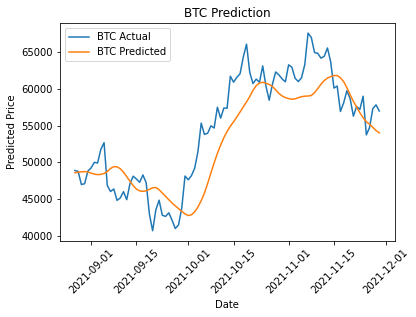

In [54]:
# Plot the real vs predicted prices as a line chart

bitcoin.plot(title="BTC Prediction", xlabel="Date",ylabel="Predicted Price", rot=45);

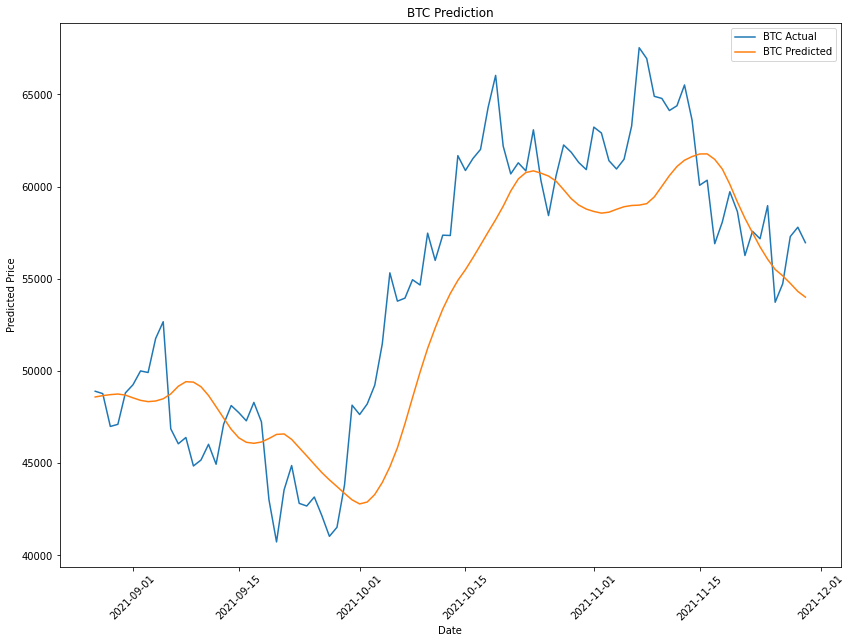

In [55]:
bitcoin.plot(figsize=(14, 10), title="BTC Prediction", xlabel="Date", ylabel="Predicted Price", rot=45);

In [56]:
# Prediction variables

In [57]:
bitcoin 

BTC Actual  BTC Predicted
2021-08-27  48903.370607   48592.390625
2021-08-28  48774.469230   48666.335938
2021-08-29  46994.872966   48718.941406
2021-08-30  47108.311976   48753.550781
2021-08-31  48814.960431   48693.421875
...                  ...            ...
2021-11-25  53729.054030   55508.472656
2021-11-26  54735.965606   55163.253906
2021-11-27  57291.753134   54755.101562
2021-11-28  57798.563566   54316.968750
2021-11-29  56960.633578   54006.679688

[95 rows x 2 columns]

In [58]:
ethereum

ETH Actual  ETH Predicted
2021-08-27  3245.284498    3126.278320
2021-08-28  3224.120200    3114.235352
2021-08-29  3228.666653    3103.888672
2021-08-30  3429.661527    3094.033691
2021-08-31  3827.574340    3084.954590
...                 ...            ...
2021-11-25  4040.282001    2711.662354
2021-11-26  4096.358260    2737.986572
2021-11-27  4296.204212    2756.559082
2021-11-28  4446.448197    2765.557861
2021-11-29  4631.615792    2773.870605

[95 rows x 2 columns]

In [59]:
gold

Gold Actual  Gold Predicted
2021-09-02   171.059998      169.467789
2021-09-03   167.710007      169.749466
2021-09-07   167.289993      170.034607
2021-09-08   168.029999      170.219498
2021-09-09   167.179993      170.277924
...                 ...             ...
2021-11-22   167.279999      174.084244
2021-11-23   167.119995      174.057922
2021-11-24   166.850006      173.729248
2021-11-26   166.619995      173.157669
2021-11-29   165.500000      172.416550

[61 rows x 2 columns]

In [60]:
stocks

SPY Actual  SPY Predicted
2021-09-02  450.051971     445.490753
2021-09-03  448.442780     446.044037
2021-09-07  447.896484     446.597473
2021-09-08  445.979401     447.144104
2021-09-09  442.463043     447.664124
...                ...            ...
2021-11-22  466.550903     461.987091
2021-11-23  467.796509     462.602600
2021-11-24  457.363190     463.176422
2021-11-26  462.973480     463.700073
2021-11-29  453.965118     464.091858

[61 rows x 2 columns]

In [61]:
combined_predictions = pd.concat([bitcoin, ethereum, gold, stocks], axis=1, join ="inner")
combined_predictions


BTC Actual  BTC Predicted  ...  SPY Actual  SPY Predicted
2021-09-02  50004.739293   48410.039062  ...  450.051971     445.490753
2021-09-03  49919.485102   48339.425781  ...  448.442780     446.044037
2021-09-07  46054.060561   49173.925781  ...  447.896484     446.597473
2021-09-08  46395.349152   49420.910156  ...  445.979401     447.144104
2021-09-09  44851.240483   49398.679688  ...  442.463043     447.664124
...                  ...            ...  ...         ...            ...
2021-11-22  57576.098440   57501.535156  ...  466.550903     461.987091
2021-11-23  57173.264165   56731.582031  ...  467.796509     462.602600
2021-11-24  58968.985403   56064.804688  ...  457.363190     463.176422
2021-11-26  54735.965606   55163.253906  ...  462.973480     463.700073
2021-11-29  56960.633578   54006.679688  ...  453.965118     464.091858

[61 rows x 8 columns]

In [62]:
# shift the predicted column
stocks['SPY Compare Prediction'] = stocks['SPY Predicted'].shift(1)
stocks.dropna(inplace=True)
stocks



SPY Actual  SPY Predicted  SPY Compare Prediction
2021-09-03  448.442780     446.044037              445.490753
2021-09-07  447.896484     446.597473              446.044037
2021-09-08  445.979401     447.144104              446.597473
2021-09-09  442.463043     447.664124              447.144104
2021-09-10  443.595398     448.143250              447.664124
2021-09-13  441.201538     448.515778              448.143250
2021-09-14  444.886749     448.789673              448.515778
2021-09-15  444.181488     448.953583              448.789673
2021-09-16  439.854675     449.038940              448.953583
2021-09-17  432.520447     449.059631              449.038940
2021-09-20  432.111908     449.001617              449.059631
2021-09-21  436.327057     448.817627              449.001617
2021-09-22  441.628448     448.480469              448.817627
2021-09-23  442.355896     448.036774              448.480469
2021-09-24  441.090363     447.573517              448.036774
2021-09-27  432.201569     447.126526              447.573517
2021-09-28  432.929016     446.722107              447.126526
2021-09-29  427.637634     446.267761              446.722107
2021-09-30  432.719757     445.776917              446.267761
2021-10-01  427.139374     445.218445              445.776917
2021-10-04  431.583740     444.640106              445.218445
2021-10-05  433.377441     443.985962              444.640106
2021-10-06  437.124268     443.269073              443.985962
2021-10-07  436.327057     442.527069              443.269073
2021-10-08  433.168182     441.841400              442.527069
2021-10-11  432.101929     441.257172              441.841400
2021-10-12  433.656464     440.787415              441.257172
2021-10-13  440.950836     440.372955              440.787415
2021-10-14  444.309021     440.035461              440.372955
2021-10-15  445.624420     439.778320              440.035461
2021-10-18  449.062347     439.696655              439.778320
2021-10-19  450.826141     439.759583              439.696655
2021-10-20  452.002014     440.005493              439.759583
2021-10-21  451.533661     440.424042              440.005493
2021-10-22  453.955139     441.034729              440.424042
2021-10-25  454.363708     441.810974              441.034729
2021-10-26  452.350800     442.721680              441.810974
2021-10-27  456.715454     443.720978              442.721680
2021-10-28  457.642181     444.732361              443.720978
2021-10-29  458.429443     445.769592              444.732361
2021-11-01  460.282898     446.830566              445.769592
2021-11-02  463.093048     447.905121              446.830566
2021-11-03  465.275391     449.001648              447.905121
2021-11-04  466.889709     450.126434              449.001648
2021-11-05  467.288300     451.292786              450.126434
2021-11-08  465.743744     452.485291              451.292786
2021-11-09  461.996887     453.705353              452.485291
2021-11-10  462.146362     454.927521              453.705353
2021-11-11  465.634094     456.075928              454.927521
2021-11-12  465.793549     457.132904              456.075928
2021-11-15  467.637085     458.109619              457.132904
2021-11-16  466.501099     459.007812              458.109619
2021-11-17  468.085510     459.840607              459.007812
2021-11-18  467.248474     460.607361              459.840607
2021-11-19  465.933075     461.321503              460.607361
2021-11-22  466.550903     461.987091              461.321503
2021-11-23  467.796509     462.602600              461.987091
2021-11-24  457.363190     463.176422              462.602600
2021-11-26  462.973480     463.700073              463.176422
2021-11-29  453.965118     464.091858              463.700073

In [63]:
SPY_actual_vs_compared = stocks['SPY Actual'] - stocks['SPY Compare Prediction']
SPY_actual_vs_compared

2021-09-03     2.952027
2021-09-07     1.852447
2021-09-08    -0.618072
2021-09-09    -4.681061
2021-09-10    -4.068726
2021-09-13    -6.941712
2021-09-14    -3.629029
2021-09-15    -4.608185
2021-09-16    -9.098908
2021-09-17   -16.518493
2021-09-20   -16.947723
2021-09-21   -12.674560
2021-09-22    -7.189179
2021-09-23    -6.124573
2021-09-24    -6.946411
2021-09-27   -15.371948
2021-09-28   -14.197510
2021-09-29   -19.084473
2021-09-30   -13.548004
2021-10-01   -18.637543
2021-10-04   -13.634705
2021-10-05   -11.262665
2021-10-06    -6.861694
2021-10-07    -6.942016
2021-10-08    -9.358887
2021-10-11    -9.739471
2021-10-12    -7.600708
2021-10-13     0.163421
2021-10-14     3.936066
2021-10-15     5.588959
2021-10-18     9.284027
2021-10-19    11.129486
2021-10-20    12.242431
2021-10-21    11.528168
2021-10-22    13.531097
2021-10-25    13.328979
2021-10-26    10.539826
2021-10-27    13.993774
2021-10-28    13.921203
2021-10-29    13.697082
2021-11-01    14.513306
2021-11-02    16

In [64]:
SPY_actual_vs_compared.sum()

63.99493183984356

In [65]:
#BTC
bitcoin['BTC Compare Prediction'] = bitcoin['BTC Predicted'].shift(1)
bitcoin.dropna(inplace=True)
bitcoin

BTC Actual  BTC Predicted  BTC Compare Prediction
2021-08-28  48774.469230   48666.335938            48592.390625
2021-08-29  46994.872966   48718.941406            48666.335938
2021-08-30  47108.311976   48753.550781            48718.941406
2021-08-31  48814.960431   48693.421875            48753.550781
2021-09-01  49254.953183   48544.804688            48693.421875
...                  ...            ...                     ...
2021-11-25  53729.054030   55508.472656            56064.804688
2021-11-26  54735.965606   55163.253906            55508.472656
2021-11-27  57291.753134   54755.101562            55163.253906
2021-11-28  57798.563566   54316.968750            54755.101562
2021-11-29  56960.633578   54006.679688            54316.968750

[94 rows x 3 columns]

In [66]:
BTC_actual_vs_compared = bitcoin['BTC Actual'] - bitcoin['BTC Compare Prediction']
BTC_actual_vs_compared

2021-08-28     182.078605
2021-08-29   -1671.462971
2021-08-30   -1610.629431
2021-08-31      61.409650
2021-09-01     561.531308
                 ...     
2021-11-25   -2335.750658
2021-11-26    -772.507050
2021-11-27    2128.499228
2021-11-28    3043.462003
2021-11-29    2643.664828
Length: 94, dtype: float64

In [67]:
BTC_actual_vs_compared.sum()

160913.20762836258

In [68]:
#Gold
gold['Gold Compare Prediction'] = gold['Gold Predicted'].shift(1)
gold.dropna(inplace=True)
gold

Gold Actual  Gold Predicted  Gold Compare Prediction
2021-09-03   167.710007      169.749466               169.467789
2021-09-07   167.289993      170.034607               169.749466
2021-09-08   168.029999      170.219498               170.034607
2021-09-09   167.179993      170.277924               170.219498
2021-09-10   167.740005      170.235031               170.277924
2021-09-13   168.820007      170.106277               170.235031
2021-09-14   167.830002      169.930206               170.106277
2021-09-15   164.029999      169.763321               169.930206
2021-09-16   163.770004      169.602234               169.763321
2021-09-17   164.940002      169.349335               169.602234
2021-09-20   166.039993      169.001602               169.349335
2021-09-21   165.419998      168.618759               169.001602
2021-09-22   163.509995      168.267090               168.618759
2021-09-23   163.300003      167.958237               168.267090
2021-09-24   163.639999      167.659210               167.958237
2021-09-27   162.050003      167.355637               167.659210
2021-09-28   161.320007      167.056564               167.355637
2021-09-29   164.220001      166.747269               167.056564
2021-09-30   164.589996      166.416931               166.747269
2021-10-01   165.360001      166.139526               166.416931
2021-10-04   164.589996      165.951782               166.139526
2021-10-05   165.029999      165.872940               165.951782
2021-10-06   164.160004      165.881622               165.872940
2021-10-07   164.229996      165.963623               165.881622
2021-10-08   163.919998      166.082581               165.963623
2021-10-11   164.660004      166.222061               166.082581
2021-10-12   167.589996      166.343948               166.222061
2021-10-13   168.000000      166.467163               166.343948
2021-10-14   165.330002      166.658356               166.467163
2021-10-15   164.919998      166.941498               166.658356
2021-10-18   165.449997      167.232422               166.941498
2021-10-19   166.899994      167.469467               167.232422
2021-10-20   166.750000      167.654984               167.469467
2021-10-21   167.770004      167.835907               167.654984
2021-10-22   168.929993      168.021637               167.835907
2021-10-25   167.679993      168.225937               168.021637
2021-10-26   168.119995      168.493011               168.225937
2021-10-27   168.080002      168.776077               168.493011
2021-10-28   166.649994      169.058792               168.776077
2021-10-29   167.520004      169.325104               169.058792
2021-11-01   167.160004      169.519363               169.325104
2021-11-02   165.770004      169.660019               169.519363
2021-11-03   167.649994      169.752792               169.660019
2021-11-04   169.839996      169.756195               169.752792
2021-11-05   170.449997      169.727112               169.756195
2021-11-08   171.289993      169.760239               169.727112
2021-11-09   173.149994      169.893738               169.760239
2021-11-10   174.119995      170.130386               169.893738
2021-11-11   174.449997      170.505798               170.130386
2021-11-12   174.179993      171.020523               170.505798
2021-11-15   172.919998      171.634674               171.020523
2021-11-16   174.500000      172.292816               171.634674
2021-11-17   173.940002      172.872345               172.292816
2021-11-18   172.610001      173.391785               172.872345
2021-11-19   168.740005      173.819458               173.391785
2021-11-22   167.279999      174.084244               173.819458
2021-11-23   167.119995      174.057922               174.084244
2021-11-24   166.850006      173.729248               174.057922
2021-11-26   166.619995      173.157669               173.729248
2021-11-29   165.500000      172.416550               173.157669

In [69]:
Gold_actual_vs_compared = gold['Gold Actual'] - gold['Gold Compare Prediction']
Gold_actual_vs_compared

2021-09-03   -1.757782
2021-09-07   -2.459473
2021-09-08   -2.004608
2021-09-09   -3.039505
2021-09-10   -2.537919
2021-09-13   -1.415024
2021-09-14   -2.276275
2021-09-15   -5.900207
2021-09-16   -5.993317
2021-09-17   -4.662232
2021-09-20   -3.309342
2021-09-21   -3.581604
2021-09-22   -5.108764
2021-09-23   -4.967087
2021-09-24   -4.318238
2021-09-27   -5.609207
2021-09-28   -6.035630
2021-09-29   -2.836563
2021-09-30   -2.157273
2021-10-01   -1.056930
2021-10-04   -1.549530
2021-10-05   -0.921783
2021-10-06   -1.712936
2021-10-07   -1.651626
2021-10-08   -2.043625
2021-10-11   -1.422577
2021-10-12    1.367935
2021-10-13    1.656052
2021-10-14   -1.137161
2021-10-15   -1.738358
2021-10-18   -1.491501
2021-10-19   -0.332428
2021-10-20   -0.719467
2021-10-21    0.115020
2021-10-22    1.094086
2021-10-25   -0.341644
2021-10-26   -0.105942
2021-10-27   -0.413009
2021-10-28   -2.126083
2021-10-29   -1.538788
2021-11-01   -2.165100
2021-11-02   -3.749359
2021-11-03   -2.010025
2021-11-04 

In [70]:
Gold_actual_vs_compared.sum()

-109.99180770898442

In [71]:
#-----ETH

In [72]:
ethereum['ETH Compare Prediction'] = ethereum['ETH Predicted'].shift(1)
ethereum.dropna(inplace=True)
ethereum

ETH Actual  ETH Predicted  ETH Compare Prediction
2021-08-28  3224.120200    3114.235352             3126.278320
2021-08-29  3228.666653    3103.888672             3114.235352
2021-08-30  3429.661527    3094.033691             3103.888672
2021-08-31  3827.574340    3084.954590             3094.033691
2021-09-01  3786.491708    3084.749268             3084.954590
...                 ...            ...                     ...
2021-11-25  4040.282001    2711.662354             2701.086426
2021-11-26  4096.358260    2737.986572             2711.662354
2021-11-27  4296.204212    2756.559082             2737.986572
2021-11-28  4446.448197    2765.557861             2756.559082
2021-11-29  4631.615792    2773.870605             2765.557861

[94 rows x 3 columns]

In [73]:
ETH_actual_vs_compared = ethereum['ETH Actual'] - ethereum['ETH Compare Prediction']
ETH_actual_vs_compared

2021-08-28      97.841879
2021-08-29     114.431302
2021-08-30     325.772855
2021-08-31     733.540649
2021-09-01     701.537118
                 ...     
2021-11-25    1339.195575
2021-11-26    1384.695907
2021-11-27    1558.217640
2021-11-28    1689.889115
2021-11-29    1866.057931
Length: 94, dtype: float64

In [74]:
ETH_actual_vs_compared.sum()

78801.5127279559

In [75]:
# convert to accuracy
# distance from prediction to actual
# confusion matrix - get direction 

In [76]:
scaler = preprocessing.MinMaxScaler()
names = combined_predictions.columns
d = scaler.fit_transform(combined_predictions)
scaled_combined_predictions = pd.DataFrame(d, columns=names)
scaled_combined_predictions.head()

BTC Actual  BTC Predicted  ...  SPY Actual  SPY Predicted
0    0.353775       0.295934  ...    0.559579       0.237510
1    0.350522       0.292215  ...    0.520279       0.260190
2    0.203044       0.336175  ...    0.506937       0.282876
3    0.216065       0.349186  ...    0.460117       0.305283
4    0.157152       0.348015  ...    0.374240       0.326600

[5 rows x 8 columns]

In [77]:
correlation = scaled_combined_predictions.corr()
correlation


BTC Actual  BTC Predicted  ...  SPY Actual  SPY Predicted
BTC Actual        1.000000       0.872862  ...    0.697552       0.088670
BTC Predicted     0.872862       1.000000  ...    0.866268       0.281977
ETH Actual        0.898088       0.853560  ...    0.859596       0.400759
ETH Predicted     0.406598       0.471475  ...    0.287212      -0.380601
Gold Actual       0.554986       0.698572  ...    0.732104       0.449701
Gold Predicted    0.188299       0.471579  ...    0.741864       0.888620
SPY Actual        0.697552       0.866268  ...    1.000000       0.592068
SPY Predicted     0.088670       0.281977  ...    0.592068       1.000000

[8 rows x 8 columns]

In [78]:

scaled_needed_predictions = scaled_combined_predictions[['BTC Predicted', 'Gold Predicted', 'SPY Predicted']].copy()
scaled_needed_predictions


BTC Predicted  Gold Predicted  SPY Predicted
0        0.295934        0.437793       0.237510
1        0.292215        0.472096       0.260190
2        0.336175        0.506822       0.282876
3        0.349186        0.529338       0.305283
4        0.348015        0.536454       0.326600
..            ...             ...            ...
56       0.774866        1.000000       0.913722
57       0.734305        0.996794       0.938953
58       0.699180        0.956767       0.962475
59       0.651687        0.887159       0.983940
60       0.590760        0.796903       1.000000

[61 rows x 3 columns]

In [79]:
correlation_needed = scaled_needed_predictions.corr()
correlation_needed

BTC Predicted  Gold Predicted  SPY Predicted
BTC Predicted        1.000000        0.471579       0.281977
Gold Predicted       0.471579        1.000000       0.888620
SPY Predicted        0.281977        0.888620       1.000000

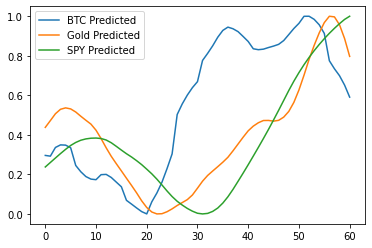

In [80]:
scaled_needed_predictions.plot()

In [81]:
scaled_needed_predictions_plus_ETH = scaled_combined_predictions[['BTC Predicted', 'Gold Predicted', 'SPY Predicted', 'ETH Predicted']].copy()
scaled_needed_predictions_plus_ETH

BTC Predicted  Gold Predicted  SPY Predicted  ETH Predicted
0        0.295934        0.437793       0.237510       0.618990
1        0.292215        0.472096       0.260190       0.678310
2        0.336175        0.506822       0.282876       0.994505
3        0.349186        0.529338       0.305283       1.000000
4        0.348015        0.536454       0.326600       0.953232
..            ...             ...            ...            ...
56       0.774866        1.000000       0.913722       0.112567
57       0.734305        0.996794       0.938953       0.096676
58       0.699180        0.956767       0.962475       0.097960
59       0.651687        0.887159       0.983940       0.144915
60       0.590760        0.796903       1.000000       0.190577

[61 rows x 4 columns]

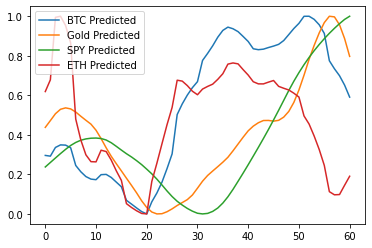

In [82]:
scaled_needed_predictions_plus_ETH.plot()

In [83]:
stocks.head()

SPY Actual  SPY Predicted  SPY Compare Prediction
2021-09-03  448.442780     446.044037              445.490753
2021-09-07  447.896484     446.597473              446.044037
2021-09-08  445.979401     447.144104              446.597473
2021-09-09  442.463043     447.664124              447.144104
2021-09-10  443.595398     448.143250              447.664124

In [84]:
gold.head()

Gold Actual  Gold Predicted  Gold Compare Prediction
2021-09-03   167.710007      169.749466               169.467789
2021-09-07   167.289993      170.034607               169.749466
2021-09-08   168.029999      170.219498               170.034607
2021-09-09   167.179993      170.277924               170.219498
2021-09-10   167.740005      170.235031               170.277924

In [85]:
bitcoin.head()

BTC Actual  BTC Predicted  BTC Compare Prediction
2021-08-28  48774.469230   48666.335938            48592.390625
2021-08-29  46994.872966   48718.941406            48666.335938
2021-08-30  47108.311976   48753.550781            48718.941406
2021-08-31  48814.960431   48693.421875            48753.550781
2021-09-01  49254.953183   48544.804688            48693.421875

In [86]:
ethereum.head()

ETH Actual  ETH Predicted  ETH Compare Prediction
2021-08-28  3224.120200    3114.235352             3126.278320
2021-08-29  3228.666653    3103.888672             3114.235352
2021-08-30  3429.661527    3094.033691             3103.888672
2021-08-31  3827.574340    3084.954590             3094.033691
2021-09-01  3786.491708    3084.749268             3084.954590

In [87]:
from sklearn.metrics import mean_absolute_percentage_error
y_true = stocks["SPY Actual"]
y_pred = stocks["SPY Predicted"]
mean_absolute_percentage_error(y_true, y_pred)

0.020802205630118087

In [88]:
from sklearn.metrics import mean_absolute_percentage_error
y_true = gold["Gold Actual"]
y_pred = gold["Gold Predicted"]
mean_absolute_percentage_error(y_true, y_pred)

0.016283879655620306

In [89]:
from sklearn.metrics import mean_absolute_percentage_error
y_true = bitcoin["BTC Actual"]
y_pred = bitcoin["BTC Predicted"]
mean_absolute_percentage_error(y_true, y_pred)

0.05873827730671181

In [90]:
from sklearn.metrics import mean_absolute_percentage_error
y_true = ethereum["ETH Actual"]
y_pred = ethereum["ETH Predicted"]
mean_absolute_percentage_error(y_true, y_pred)

0.20706846867649964